In [1]:
import torch
from tools import config, Wrapper, DatasetQuora
from modelling.models import RNNCNNMatch
from modelling.templates import SimilarityTemplate

In [2]:
%%time
dataset = DatasetQuora(train_file=config.TRAIN_FILE,
                       test_file=config.TEST_FILE, 
                       sample_submission_file=config.SAMPLE_SUBMISSION_FILE)

CPU times: user 1min 11s, sys: 568 ms, total: 1min 12s
Wall time: 1min 12s


In [3]:
rnn_cnn_match = SimilarityTemplate(
    query_model=RNNCNNMatch(), 
    vocab_size=len(dataset.token2index),
    loss_type='cross_entropy')

In [4]:
rnn_cnn_match

SimilarityTemplate(
  (query_embedding_layer): Embedding(79279, 300, padding_idx=0)
  (candidate_embedding_layer): Embedding(79279, 300, padding_idx=0)
  (query_model): RNNCNNMatch(
    (fully_connected): Linear(in_features=896, out_features=300, bias=True)
    (model): Sequential(
      (0): RNN(
        (rnn): LSTM(300, 256)
      )
      (1): CNN(
        (convolution_layer): Conv1d(256, 128, kernel_size=(1,), stride=(1,))
        (activation_function): GELU()
        (pool_layer): MaxPool1d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
      )
      (2): CNN(
        (convolution_layer): Conv1d(128, 128, kernel_size=(2,), stride=(1,))
        (activation_function): GELU()
        (pool_layer): MaxPool1d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
      )
      (3): CNN(
        (convolution_layer): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
        (activation_function): GELU()
        (pool_layer): MaxPool1d(kernel_size=4, stride=1, pad

In [5]:
optimizer = torch.optim.Adam(rnn_cnn_match.parameters(), lr=0.0001)

In [6]:
rcm = Wrapper(dataset=dataset, 
              model=rnn_cnn_match, 
              optimizer=optimizer, 
              model_name=config.MODEL_NAME, 
              max_norm=0.1,
              batch_size=32,
              generate_negatives_type='hard', 
              hard_negatives_multiplier=32, 
              validation_batch_size_multiplier=32)

Train Epoch 1:   0%|          | 0/3731 [00:00<?, ?it/s]/floyd/home/tools/wrapper.py:261: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad.clip_grad_norm(self.model.parameters(), max_norm=self.max_norm)
Train Epoch 2:   0%|          | 1/3731 [00:00<07:12,  8.62it/s]

Epoch: [1/15] | Cross_entropy loss: 0.555 | Validation Loss: 0.541
Mean Recall: 0.82 | Validation Recall: 0.75


Train Epoch 3:   0%|          | 1/3731 [00:00<07:05,  8.77it/s]

Epoch: [2/15] | Cross_entropy loss: 0.576 | Validation Loss: 0.510
Mean Recall: 0.74 | Validation Recall: 0.76


Train Epoch 4:   0%|          | 1/3731 [00:00<07:17,  8.52it/s]

Epoch: [3/15] | Cross_entropy loss: 0.733 | Validation Loss: 0.486
Mean Recall: 0.64 | Validation Recall: 0.78


Train Epoch 5:   0%|          | 1/3731 [00:00<07:16,  8.55it/s]

Epoch: [4/15] | Cross_entropy loss: 0.788 | Validation Loss: 0.522
Mean Recall: 0.60 | Validation Recall: 0.78


Train Epoch 6:   0%|          | 1/3731 [00:00<06:56,  8.95it/s]

Epoch: [5/15] | Cross_entropy loss: 0.462 | Validation Loss: 0.275
Mean Recall: 0.81 | Validation Recall: 0.88


Train Epoch 7:   0%|          | 1/3731 [00:00<07:15,  8.56it/s]

Epoch: [6/15] | Cross_entropy loss: 0.345 | Validation Loss: 0.337
Mean Recall: 0.87 | Validation Recall: 0.86


Train Epoch 8:   0%|          | 1/3731 [00:00<06:59,  8.89it/s]

Epoch: [7/15] | Cross_entropy loss: 0.389 | Validation Loss: 0.169
Mean Recall: 0.85 | Validation Recall: 0.95


Train Epoch 9:   0%|          | 1/3731 [00:00<07:08,  8.70it/s]

Epoch: [8/15] | Cross_entropy loss: 0.377 | Validation Loss: 0.137
Mean Recall: 0.85 | Validation Recall: 0.96


Train Epoch 10:   0%|          | 1/3731 [00:00<07:18,  8.50it/s]

Epoch: [9/15] | Cross_entropy loss: 0.338 | Validation Loss: 0.241
Mean Recall: 0.87 | Validation Recall: 0.93


Train Epoch 11:   0%|          | 1/3731 [00:00<07:14,  8.59it/s]

Epoch: [10/15] | Cross_entropy loss: 0.302 | Validation Loss: 0.203
Mean Recall: 0.89 | Validation Recall: 0.93


Train Epoch 12:   0%|          | 1/3731 [00:00<07:14,  8.59it/s]

Epoch: [11/15] | Cross_entropy loss: 0.427 | Validation Loss: 0.612
Mean Recall: 0.82 | Validation Recall: 0.67


Train Epoch 13:   0%|          | 1/3731 [00:00<07:18,  8.51it/s]

Epoch: [12/15] | Cross_entropy loss: 0.414 | Validation Loss: 0.338
Mean Recall: 0.83 | Validation Recall: 0.86


Train Epoch 14:   0%|          | 1/3731 [00:00<07:06,  8.75it/s]

Epoch: [13/15] | Cross_entropy loss: 0.403 | Validation Loss: 0.393
Mean Recall: 0.83 | Validation Recall: 0.83


Train Epoch 15:   0%|          | 1/3731 [00:00<07:14,  8.58it/s]

Epoch: [14/15] | Cross_entropy loss: 0.327 | Validation Loss: 0.340
Mean Recall: 0.87 | Validation Recall: 0.87


Train Epoch 15:  50%|█████     | 1866/3731 [03:31<03:31,  8.80it/s]


Epoch: [15/15] | Cross_entropy loss: 0.268 | Validation Loss: 0.508
Mean Recall: 0.90 | Validation Recall: 0.77


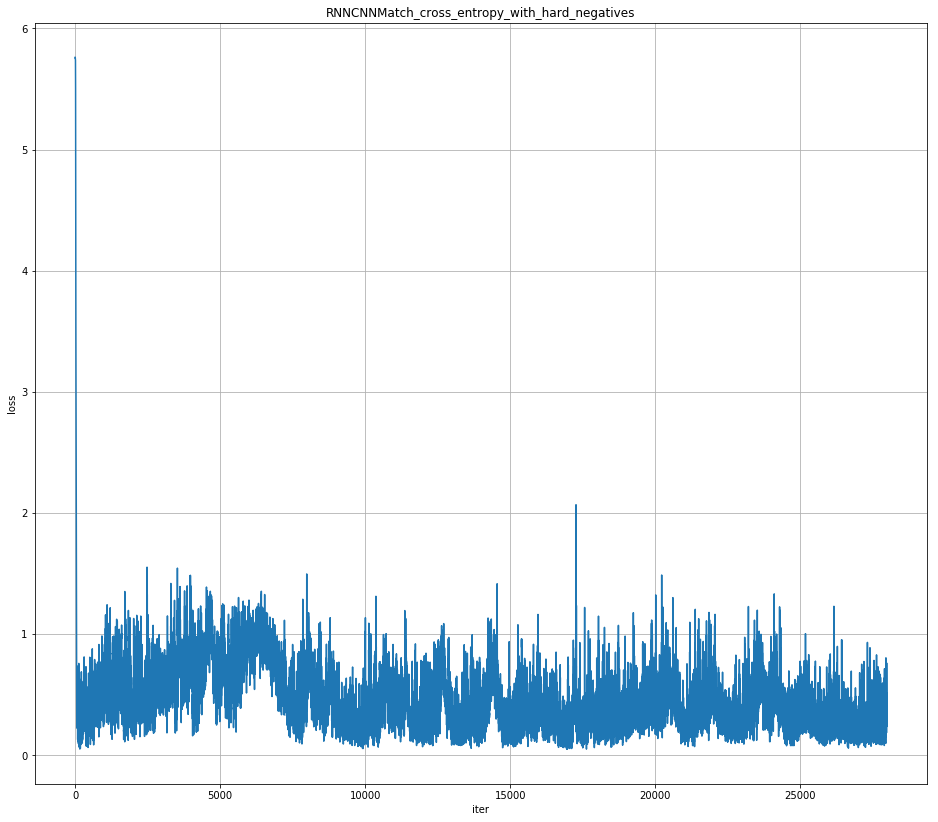

In [7]:
rcm.train(epochs=15, verbose=config.VERBOSE, save_best=True)

Train Epoch 16:   0%|          | 0/3731 [00:00<?, ?it/s]/floyd/home/tools/wrapper.py:261: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad.clip_grad_norm(self.model.parameters(), max_norm=self.max_norm)
Train Epoch 17:   0%|          | 1/3731 [00:00<07:13,  8.61it/s]

Epoch: [1/15] | Cross_entropy loss: 0.370 | Validation Loss: 0.390
Mean Recall: 0.85 | Validation Recall: 0.85


Train Epoch 18:   0%|          | 1/3731 [00:00<07:11,  8.65it/s]

Epoch: [2/15] | Cross_entropy loss: 0.442 | Validation Loss: 0.348
Mean Recall: 0.81 | Validation Recall: 0.82


Train Epoch 19:   0%|          | 1/3731 [00:00<07:07,  8.73it/s]

Epoch: [3/15] | Cross_entropy loss: 0.263 | Validation Loss: 0.223
Mean Recall: 0.90 | Validation Recall: 0.92


Train Epoch 20:   0%|          | 1/3731 [00:00<07:13,  8.60it/s]

Epoch: [4/15] | Cross_entropy loss: 0.220 | Validation Loss: 0.416
Mean Recall: 0.92 | Validation Recall: 0.80


Train Epoch 21:   0%|          | 1/3731 [00:00<07:14,  8.59it/s]

Epoch: [5/15] | Cross_entropy loss: 0.297 | Validation Loss: 0.319
Mean Recall: 0.88 | Validation Recall: 0.88


Train Epoch 22:   0%|          | 1/3731 [00:00<07:15,  8.56it/s]

Epoch: [6/15] | Cross_entropy loss: 0.593 | Validation Loss: 0.725
Mean Recall: 0.73 | Validation Recall: 0.65


Train Epoch 23:   0%|          | 1/3731 [00:00<07:17,  8.53it/s]

Epoch: [7/15] | Cross_entropy loss: 0.743 | Validation Loss: 0.735
Mean Recall: 0.60 | Validation Recall: 0.57


Train Epoch 24:   0%|          | 1/3731 [00:00<07:18,  8.51it/s]

Epoch: [8/15] | Cross_entropy loss: 0.723 | Validation Loss: 0.708
Mean Recall: 0.58 | Validation Recall: 0.59


Train Epoch 25:   0%|          | 1/3731 [00:00<07:17,  8.54it/s]

Epoch: [9/15] | Cross_entropy loss: 0.698 | Validation Loss: 0.698
Mean Recall: 0.59 | Validation Recall: 0.59


Train Epoch 26:   0%|          | 1/3731 [00:00<07:13,  8.60it/s]

Epoch: [10/15] | Cross_entropy loss: 0.659 | Validation Loss: 0.674
Mean Recall: 0.62 | Validation Recall: 0.61


Train Epoch 27:   0%|          | 1/3731 [00:00<07:17,  8.53it/s]

Epoch: [11/15] | Cross_entropy loss: 0.637 | Validation Loss: 0.656
Mean Recall: 0.63 | Validation Recall: 0.62


Train Epoch 28:   0%|          | 1/3731 [00:00<07:16,  8.55it/s]

Epoch: [12/15] | Cross_entropy loss: 0.612 | Validation Loss: 0.645
Mean Recall: 0.65 | Validation Recall: 0.63


Train Epoch 29:   0%|          | 1/3731 [00:00<07:21,  8.45it/s]

Epoch: [13/15] | Cross_entropy loss: 0.591 | Validation Loss: 0.633
Mean Recall: 0.67 | Validation Recall: 0.63


Train Epoch 30:   0%|          | 1/3731 [00:00<07:13,  8.60it/s]

Epoch: [14/15] | Cross_entropy loss: 0.576 | Validation Loss: 0.623
Mean Recall: 0.68 | Validation Recall: 0.64


Train Epoch 30:  50%|█████     | 1866/3731 [03:31<03:29,  8.89it/s]


Epoch: [15/15] | Cross_entropy loss: 0.560 | Validation Loss: 0.622
Mean Recall: 0.69 | Validation Recall: 0.65


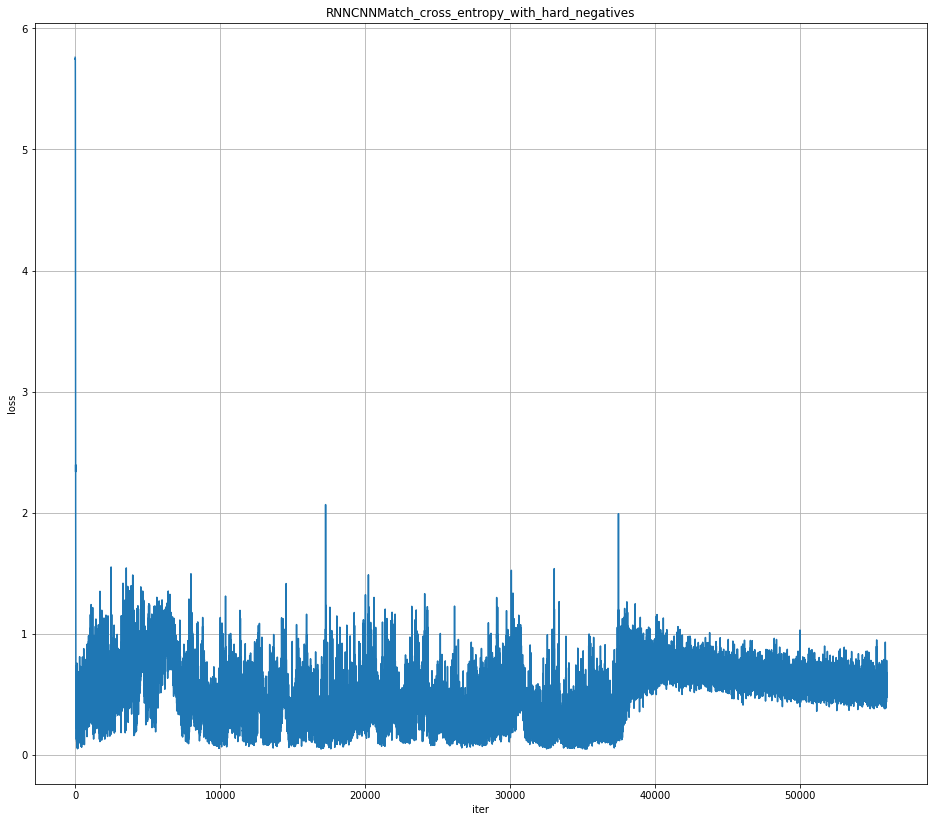

In [8]:
rcm.train(epochs=15, verbose=config.VERBOSE, save_best=True)

In [9]:
rcm.submission(verbose=config.VERBOSE)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
Train Epoch 31: 100%|█████████▉| 1145/1146 [03:35<00:00,  5.37it/s]

In [12]:
rcm.train(epochs=15, save_best=True)

/floyd/home/tools/wrapper.py:261: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad.clip_grad_norm(self.model.parameters(), max_norm=self.max_norm)


KeyboardInterrupt: 

In [11]:
torch.save(rcm.model, 'rcm_ce_tr_hard')

In [ ]:
rcm.submission(verbose=config.VERBOSE)